In [1]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

from __future__ import division

from collections import Counter

Here we analyze data from the UFC. Some of the question that we will try to answer are:

1. Who are the fighters with the most amount of wins?

2. What are the most common ways fights end?

3. How do these top fighters win?

4. For fights that do not go to decision, what are the main methods used to win the fight?

5. Which submissions are most effective?

6. Which TKOs are more effective?

7. As the rounds progress which methods increase in likelyhood to win?

8. Within rounds which methods are most effective in finishing fights?

In [2]:
fights = pd.read_csv("/Users/earleaguilar/DataSets/ALL_UFC_FIGHTS_(2-23-2016)_SHERDOG.COM_Sheet1.csv")


In [3]:
fights = fights.drop(["pageurl","f1pageurl","f2pageurl"],1)

In [4]:
fights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3569 entries, 0 to 3568
Data columns (total 17 columns):
eid            3569 non-null int64
mid            3569 non-null int64
event_name     3569 non-null object
event_org      3569 non-null object
event_date     3569 non-null object
event_place    3569 non-null object
f1name         3569 non-null object
f2name         3569 non-null object
f1result       3569 non-null object
f2result       3569 non-null object
f1fid          3569 non-null int64
f2fid          3569 non-null int64
method         3569 non-null object
method_d       3549 non-null object
ref            3248 non-null object
round          3569 non-null int64
time           3568 non-null object
dtypes: int64(5), object(12)
memory usage: 474.1+ KB


In [5]:
fights.head()

,eid,mid,event_name,event_org,event_date,event_place,f1name,f2name,f1result,f2result,f1fid,f2fid,method,method_d,ref,round,time
0,7,8,UFC 1 - The Beginning,Ultimate Fighting Championship,11/12/1993,"McNichols Arena, Denver, Colorado, United States",Royce Gracie,Gerard Gordeau,win,loss,19,15,Submission,Rear-Naked Choke,Helio Vigio,1,1:44
1,7,7,UFC 1 - The Beginning,Ultimate Fighting Championship,11/12/1993,"McNichols Arena, Denver, Colorado, United States",Jason DeLucia,Trent Jenkins,win,loss,22,23,Submission,Rear-Naked Choke,Joao Alberto Barreto,1,0:52
2,7,6,UFC 1 - The Beginning,Ultimate Fighting Championship,11/12/1993,"McNichols Arena, Denver, Colorado, United States",Royce Gracie,Ken Shamrock,win,loss,19,4,Submission,Rear-Naked Choke,Helio Vigio,1,0:57
3,7,5,UFC 1 - The Beginning,Ultimate Fighting Championship,11/12/1993,"McNichols Arena, Denver, Colorado, United States",Gerard Gordeau,Kevin Rosier,win,loss,15,17,TKO,Corner Stoppage,Joao Alberto Barreto,1,0:59
4,7,4,UFC 1 - The Beginning,Ultimate Fighting Championship,11/12/1993,"McNichols Arena, Denver, Colorado, United States",Ken Shamrock,Patrick Smith,win,loss,4,21,Submission,Heel Hook,Helio Vigio,1,1:49


## Who were the fighters with the most amount of wins?

In [6]:
res1 = fights["f1result"].groupby([fights["f1name"]])
res2 = fights["f2result"].groupby([fights["f2name"]])

In [7]:
res1 = res1.value_counts().unstack()

res2 = res2.value_counts().unstack()

tot_res = res1.combine_first(res2)

tot_res.fillna(0, inplace=True)

In [8]:
tot_res = DataFrame(tot_res)
tot_res.head()

,NC,draw,loss,win
Aaron Brink,0.0,0.0,1.0,0.0
Aaron Phillips,0.0,0.0,2.0,0.0
Aaron Riley,0.0,0.0,6.0,3.0
Aaron Rosa,0.0,0.0,2.0,1.0
Aaron Simpson,0.0,0.0,4.0,7.0


In [9]:
top_ten_f = tot_res.sort_values('win',ascending=False).head(n=10)
top_ten_f

,NC,draw,loss,win
Georges St. Pierre,0.0,0.0,2.0,19.0
Matt Hughes,0.0,0.0,7.0,18.0
Michael Bisping,0.0,0.0,7.0,17.0
Gleison Tibau,0.0,0.0,9.0,17.0
Frank Mir,0.0,0.0,10.0,16.0
Donald Cerrone,0.0,0.0,4.0,16.0
Chuck Liddell,0.0,0.0,7.0,16.0
Anderson Silva,1.0,0.0,2.0,16.0
Demian Maia,0.0,0.0,6.0,16.0
Randy Couture,0.0,0.0,8.0,15.0


In [10]:
top_ten_f.describe()

,NC,draw,loss,win
count,10.000000,10.0,10.000000,10.000000
mean,0.100000,0.0,6.200000,16.600000
std,0.316228,0.0,2.740641,1.173788
min,0.000000,0.0,2.000000,15.000000
25%,0.000000,0.0,4.500000,16.000000
50%,0.000000,0.0,7.000000,16.000000
75%,0.000000,0.0,7.750000,17.000000
max,1.000000,0.0,10.000000,19.000000


As we can see the top fighters all have more than 15 wins with the mean number of wins being 16 and the mean
amount of losses being 6. Which puts Georges St. Pierre's record of 19 wins and 2 loses at two standard deviations above the mean for wins and one and a half standard deviations below the mean for losses.

# What are the most common ways fights end?

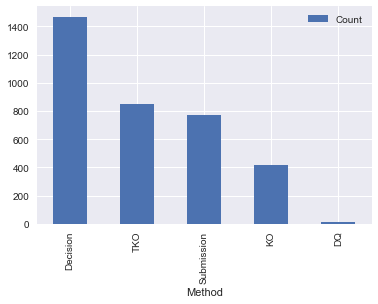

In [11]:
finish1 = fights[fights["f1result"] == 'win'][['f1name','method']]
finish2 = fights[fights["f2result"] == 'win'][['f2name','method']] 

finish1.columns = ['Name', 'Method']
finish2.columns = ['Name', 'Method']

fight_finish = pd.concat([finish1,finish2])

fight_finish = DataFrame(Counter(fight_finish.Method).most_common(), columns=['Method', 'Count'])

fight_finish.loc[fight_finish['Method'] == 'TKO','Count'] = fight_finish.loc[fight_finish['Method'] == 'Technical','Count'].values + fight_finish.loc[fight_finish['Method'] == 'TKO','Count'].values
fight_finish = fight_finish[fight_finish['Method'] != 'Technical']
#+ fight_finish.loc[fight_finish['Method'] == 'Technical','Count']
#fight_finish.head()

fight_finish = fight_finish.pivot_table(index='Method')
fight_finish.sort_values('Count',ascending=False).plot(kind='bar')

From the graph we can see that most fights end in a decision followed by a TKO, Submission, KO, and rarely does a fight end in a DQ

# How do these top fighters win?

In [12]:
# There are some "No contest" values that have descriptions on them but for the sake of analysis 
# I will convert them all to NC and since most NC occur post-fight I will ommit such fight results.

fights.loc[fights['method'] == "Technical",'method'] = "TKO"
fights.loc[fights['method'] == "No Contest",'method'] = "NC"
fights.loc[fights['method'] == "No",'method'] = "NC"
fights.loc[fights['method'] == "No Contest - Hoffman Failed Drug Test",'method'] = "NC"
fights.loc[fights['method'] == "No Contest - Overturned by State Commission",'method'] = "NC"
fights.loc[fights['method'] == "No Contest - Caceres Failed Drug Test",'method'] = "NC"
fights.loc[fights['method'] == "No Contest - Overturned by Commission",'method'] = "NC"

fights['method'].unique()

array(['Submission', 'TKO', 'KO', 'Draw', 'Decision', 'DQ', 'NC'], dtype=object)

In [13]:
# Making two seperate dataframes with the name of the fighter who won and the method 
# used to win.
method1 = fights[fights["f1result"] == 'win'][['f1name','method']]
method2 = fights[fights["f2result"] == 'win'][['f2name','method']] 

method1.columns = ['Name','Method']
method2.columns = ['Name','Method']

winning_methods = pd.concat([method1,method2])
winning_methods.head()

,Name,Method
0,Royce Gracie,Submission
1,Jason DeLucia,Submission
2,Royce Gracie,Submission
3,Gerard Gordeau,TKO
4,Ken Shamrock,Submission


In [14]:
# I create seperate columns so that I can count the number of occurences for each method. I am certain there
# is a more efficient method than this and will investigate further.
winning_methods['Decision'] = 0
winning_methods['Submission'] = 0
winning_methods['TKO'] = 0
winning_methods['KO'] = 0
winning_methods['DQ'] = 0
winning_methods['NC'] = 0

In [15]:
winning_methods.loc[winning_methods['Method'] == 'Decision', 'Decision' ] = 1
winning_methods.loc[winning_methods['Method'] == 'Submission', 'Submission' ] = 1
winning_methods.loc[winning_methods['Method'] == 'TKO', 'TKO' ] = 1
winning_methods.loc[winning_methods['Method'] == 'Technical', 'TKO' ] = 1
winning_methods.loc[winning_methods['Method'] == 'KO', 'KO' ] = 1
winning_methods.loc[winning_methods['Method'] == 'DQ', 'DQ' ] = 1
winning_methods.loc[winning_methods['Method'] == 'NC', 'NC' ] = 1

winning_methods.head()

,Name,Method,Decision,Submission,TKO,KO,DQ,NC
0,Royce Gracie,Submission,0,1,0,0,0,0
1,Jason DeLucia,Submission,0,1,0,0,0,0
2,Royce Gracie,Submission,0,1,0,0,0,0
3,Gerard Gordeau,TKO,0,0,1,0,0,0
4,Ken Shamrock,Submission,0,1,0,0,0,0


In [16]:
# Here I group the fight ending methods by fighter 
winning_methods = winning_methods.groupby("Name").sum().astype(float)
winning_methods.head()

,Decision,Submission,TKO,KO,DQ,NC
Name,,,,,,
Aaron Riley,3.0,0.0,0.0,0.0,0.0,0.0
Aaron Rosa,1.0,0.0,0.0,0.0,0.0,0.0
Aaron Simpson,5.0,0.0,2.0,0.0,0.0,0.0
Abel Trujillo,0.0,1.0,2.0,1.0,0.0,0.0
Adlan Amagov,1.0,0.0,0.0,1.0,0.0,0.0


In [17]:
# testing to see if I have an accurate model by showing the result of Anderson Silva.
winning_methods.loc['Anderson Silva']

Decision      2.0
Submission    3.0
TKO           6.0
KO            5.0
DQ            0.0
NC            0.0
Name: Anderson Silva, dtype: float64

In [18]:
top_ten = tot_res['win'].sort_values(ascending=False).head(n=10).index.values

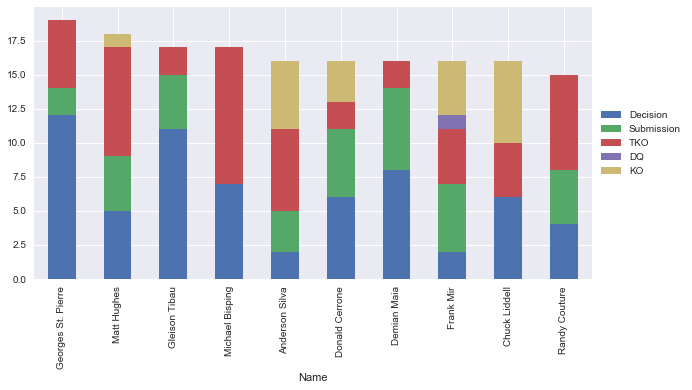

In [19]:
col = ['Decision','Submission','TKO',"DQ","KO"]
winning_methods.loc[top_ten,col].plot(rot=90, kind='bar', figsize=(10,5),stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [20]:
winning_methods.loc[top_ten,col].describe()

,Decision,Submission,TKO,DQ,KO
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,6.300000,3.300000,5.000000,0.100000,1.900000
std,3.368151,2.057507,2.748737,0.316228,2.378141
min,2.000000,0.000000,2.000000,0.000000,0.000000
25%,4.250000,2.250000,2.500000,0.000000,0.000000
50%,6.000000,4.000000,4.500000,0.000000,0.500000
75%,7.750000,4.750000,6.750000,0.000000,3.750000
max,12.000000,6.000000,10.000000,1.000000,6.000000


As we can see the most commmon methods for finishing fights among the top ten fighters with most wins
in decending order are Decision, TKO, Submission and KO are equal, and one DQ. The DQ is for Frank Mir for illegal
stomping 

# For fights that do not go to decision, what are the main methods used to win the fight?

In [21]:
# Specific methods used to 
fights[fights['method'] == 'Decision'].head(3)

,eid,mid,event_name,event_org,event_date,event_place,f1name,f2name,f1result,f2result,f1fid,f2fid,method,method_d,ref,round,time
76,15,3,UFC 8 - David vs. Goliath,Ultimate Fighting Championship,2/16/1996,"Ruben Rodriguez Coliseum, San Juan, Puerto Ric...",Paul Varelans,Joe Moreira,win,loss,112,126,Decision,Unanimous,John McCarthy,1,10:00
79,16,7,UFC 9 - Motor City Madness,Ultimate Fighting Championship,5/17/1996,"Cobo Arena, Detroit, Michigan, United States",Dan Severn,Ken Shamrock,win,loss,52,4,Decision,Split,John McCarthy,1,30:00:00
93,17,2,UFC 10 - The Tournament,Ultimate Fighting Championship,7/12/1996,"Alabama State Fair Arena, Birmingham, Alabama,...",Sam Adkins,Felix Mitchell,win,loss,122,45,Decision,Unanimous,NaN,1,10:00


In [22]:
type_finish1 = fights[fights["f1result"] == 'win'][['f1name','method_d']]
type_finish2 = fights[fights["f2result"] == 'win'][['f2name','method_d']] 

type_finish1.columns = ['Name', 'Method']
type_finish2.columns = ['Name', 'Method']

methods = pd.concat([type_finish1,type_finish2])

In [23]:
methods = methods.loc[(methods['Method'] != 'Split') ]
methods = methods.loc[(methods['Method'] != 'Unanimous')]
methods = DataFrame(Counter(methods.Method).most_common(10),columns=["Finish_Move", "Count"])
methods = methods.pivot_table(index='Finish_Move')
p_method= methods.div(methods.sum(0),1)

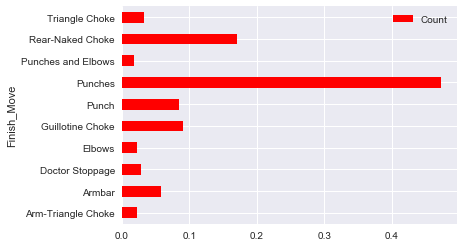

In [24]:
p_method.plot(kind='barh',ylim=(0.0,max(p_method.Count)+.05),color='red')

# Which submissions are most effective?

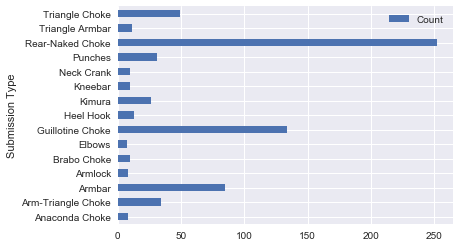

In [25]:
submissions = fights.loc[fights['method'] == 'Submission']['method_d']
submissions = DataFrame(Counter(submissions).most_common(15), columns= ['Submission Type', 'Count'])
submissions.pivot_table(index = 'Submission Type').plot(kind='barh')

# Which TKOs are more effective? Maybe might take this off.

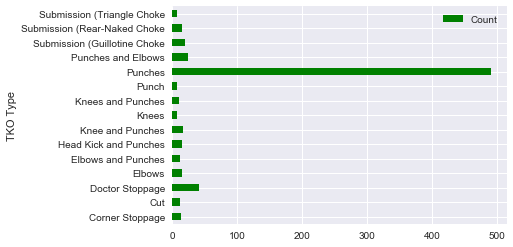

In [26]:
tko = fights.loc[fights['method'] == 'TKO']['method_d']
tko = DataFrame(Counter(tko).most_common(15), columns= ['TKO Type', 'Count'])
tko.pivot_table(index = 'TKO Type').plot(kind='barh', color='green')

# As the rounds progress which methods increase in likelyhood to win?

In [27]:
finish_method_by_round = pd.crosstab(fights['round'], fights['method'])
finish_method_by_round

method,DQ,Decision,Draw,KO,NC,Submission,TKO
round,,,,,,,
1,7,23,2,289,15,436,454
2,2,7,2,86,8,220,253
3,2,1358,14,37,14,98,123
4,0,0,0,1,0,8,12
5,0,82,3,1,1,6,5


In [28]:
finish_method_by_round.drop('NC',axis=1, inplace=True)

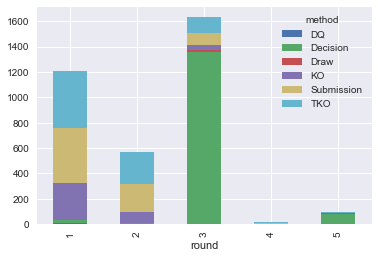

In [29]:
finish_method_by_round.plot(kind='bar',stacked=True)

Here I realized that I made the mistake of thinking these were all 5 round fights, but the overwhelming amount of decisions for round 3 means that there is a mix of 5 round fights and 3 round fights. Without data I can use that can tell me which of these fights are 5 round fights further analysis cannot be done. 

However the data shows that there are only a handful of 5 round fights which is true since most of these fights are title fights. An interesting observation is that round 4 is a round with very significantly less amount of finishes. This could be as a result of fighters "gassing out" or preserving energy for the last round.

Further examination into round 3 shows that for fights that go into the third round decision is the most likely outcome. 

The earlier rounds are rounds in which one is to see a fighter being knockout, submitted, or TKO'd.

In [30]:
fighter = pd.read_csv("/Users/earleaguilar/DataSets/ALL_UFC_FIGHTERS_(2-23-2016)_SHERDOG.COM_Sheet1.csv")

In [31]:
wins1 = fights[fights["f1result"] == 'win'].copy()

drop_list1 = ['eid','mid', 'event_org','f2name','f2result','f1fid','f2fid']
wins1.drop(drop_list1,axis=1,inplace=True)

known_fighters = wins1[wins1.f1name.isin(fighter.name)]


#known_fighters = pd.concat([set1,set2])


In [32]:
fighter.head()

,url,fid,name,nick,birth_date,height,weight,association,class,locality,country
0,/fighter/Conor-McGregor-29688,29688,Conor McGregor,Notorious,7/14/1988,68.0,145.0,SBG Ireland,Featherweight,Dublin,Ireland
1,/fighter/Jon-Jones-27944,27944,Jon Jones,Bones,7/19/1987,76.0,205.0,Jackson-Wink MMA,Light Heavyweight,"Rochester, New York",United States
2,/fighter/Holly-Holm-75125,75125,Holly Holm,The Preacher's Daughter,10/17/1981,68.0,135.0,Jackson-Wink MMA,Bantamweight,"Albuquerque, New Mexico",United States
3,/fighter/Dominick-Cruz-12107,12107,Dominick Cruz,The Dominator,9/3/1985,68.0,134.0,Alliance MMA,Bantamweight,"San Diego, California",United States
4,/fighter/Demetrious-Johnson-45452,45452,Demetrious Johnson,Mighty Mouse,8/13/1986,63.0,125.0,AMC Pankration,Flyweight,"Kirkland, Washington",United States


In [33]:
big_ufc_dat = known_fighters.merge(fighter, left_on="f1name", right_on='name')
big_ufc_dat.drop(["f1name",'fid','nick','url'], axis=1,inplace=True)

In [34]:
big_ufc_dat.head()

,event_name,event_date,event_place,f1result,method,method_d,ref,round,time,name,birth_date,height,weight,association,class,locality,country
0,UFC 1 - The Beginning,11/12/1993,"McNichols Arena, Denver, Colorado, United States",win,Submission,Rear-Naked Choke,Helio Vigio,1,1:44,Royce Gracie,12/12/1966,72.0,176.0,Gracie Humaita,Middleweight,Rio de Janeiro,Brazil
1,UFC 1 - The Beginning,11/12/1993,"McNichols Arena, Denver, Colorado, United States",win,Submission,Rear-Naked Choke,Helio Vigio,1,1:44,Royce Gracie,12/12/1966,72.0,176.0,Gracie Humaita,Middleweight,Rio de Janeiro,Brazil
2,UFC 1 - The Beginning,11/12/1993,"McNichols Arena, Denver, Colorado, United States",win,Submission,Rear-Naked Choke,Helio Vigio,1,0:57,Royce Gracie,12/12/1966,72.0,176.0,Gracie Humaita,Middleweight,Rio de Janeiro,Brazil
3,UFC 1 - The Beginning,11/12/1993,"McNichols Arena, Denver, Colorado, United States",win,Submission,Rear-Naked Choke,Helio Vigio,1,0:57,Royce Gracie,12/12/1966,72.0,176.0,Gracie Humaita,Middleweight,Rio de Janeiro,Brazil
4,UFC 1 - The Beginning,11/12/1993,"McNichols Arena, Denver, Colorado, United States",win,Submission,Smother Choke,Joao Alberto Barreto,1,2:18,Royce Gracie,12/12/1966,72.0,176.0,Gracie Humaita,Middleweight,Rio de Janeiro,Brazil


In [35]:
big_ufc_dat.head()

,event_name,event_date,event_place,f1result,method,method_d,ref,round,time,name,birth_date,height,weight,association,class,locality,country
0,UFC 1 - The Beginning,11/12/1993,"McNichols Arena, Denver, Colorado, United States",win,Submission,Rear-Naked Choke,Helio Vigio,1,1:44,Royce Gracie,12/12/1966,72.0,176.0,Gracie Humaita,Middleweight,Rio de Janeiro,Brazil
1,UFC 1 - The Beginning,11/12/1993,"McNichols Arena, Denver, Colorado, United States",win,Submission,Rear-Naked Choke,Helio Vigio,1,1:44,Royce Gracie,12/12/1966,72.0,176.0,Gracie Humaita,Middleweight,Rio de Janeiro,Brazil
2,UFC 1 - The Beginning,11/12/1993,"McNichols Arena, Denver, Colorado, United States",win,Submission,Rear-Naked Choke,Helio Vigio,1,0:57,Royce Gracie,12/12/1966,72.0,176.0,Gracie Humaita,Middleweight,Rio de Janeiro,Brazil
3,UFC 1 - The Beginning,11/12/1993,"McNichols Arena, Denver, Colorado, United States",win,Submission,Rear-Naked Choke,Helio Vigio,1,0:57,Royce Gracie,12/12/1966,72.0,176.0,Gracie Humaita,Middleweight,Rio de Janeiro,Brazil
4,UFC 1 - The Beginning,11/12/1993,"McNichols Arena, Denver, Colorado, United States",win,Submission,Smother Choke,Joao Alberto Barreto,1,2:18,Royce Gracie,12/12/1966,72.0,176.0,Gracie Humaita,Middleweight,Rio de Janeiro,Brazil


# We have now merged a new DataSet and can begin to answer more intersting questions such as:

1) Which gym produce more fighters that win?

2) What type of weightclass do the top gyms tend to condition better?

3) What type of fighter do top gyms tend to create? i.e knocout artist, submission artist, wrestler types.

4) Which countries have more winning fighters?

5) Might be able to do some predictive work?

# Which gyms have more wins in the UFC?

In [36]:
pd.crosstab(big_ufc_dat['association'], big_ufc_dat['f1result']).sort_values('win',ascending=False).head(10)

f1result,win
association,
American Top Team,215
Jackson-Wink MMA,159
Blackzilians,82
American Kickboxing Academy,76
Tristar Gym,71
Xtreme Couture,71
Alliance MMA,70
Nova Uniao,67
MMA Lab,51


# What type of weightclass do the top gyms tend to condition better?

In [37]:
test =big_ufc_dat['f1result'].groupby([big_ufc_dat['association'],big_ufc_dat['class']]).count()

In [38]:
test = test.unstack().fillna(0)
top_gyms = ['American Top Team', 'Jackson-Wink MMA','Blackzilians','American Kickboxing Academy','Tristar Gym',
           'Xtreme Couture','Alliance MMA','Nova Uniao','MMA Lab','Team Nogueira']
test = test.loc[top_gyms]

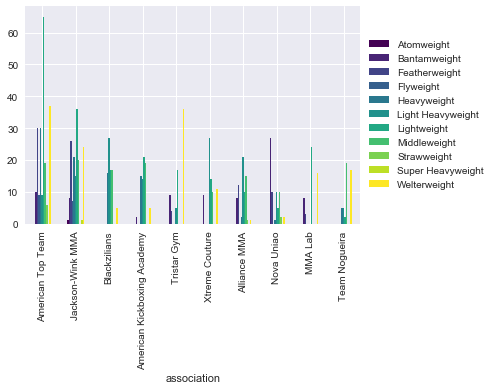

In [39]:
test.plot(kind='bar',cmap='viridis')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# What type of fighter do top gyms tend to create? i.e knockout artist, submission artist, wrestler types.



In [40]:
test = pd.crosstab(big_ufc_dat['association'], big_ufc_dat['method'])

In [41]:
test = test.loc[top_gyms]

In [42]:
#test.loc[:, (test > 5).any(axis=0)]
test

method,DQ,Decision,KO,Submission,TKO
association,,,,,
American Top Team,0,92,29,40,54
Jackson-Wink MMA,0,71,19,26,43
Blackzilians,0,25,25,7,25
American Kickboxing Academy,0,38,7,13,18
Tristar Gym,0,42,4,9,16
Xtreme Couture,0,37,2,18,14
Alliance MMA,0,31,11,9,19
Nova Uniao,0,31,3,18,15
MMA Lab,1,30,1,12,7


# Which countries have more winning fighters?

In [43]:
pd.crosstab(big_ufc_dat['country'],big_ufc_dat['f1result']).sort_values('win',ascending=False).head(10)

f1result,win
country,
United States,2172
Brazil,584
Canada,195
England,110
Japan,73
Russia,52
Australia,49
South Korea,28
Netherlands,28
